In [ ]:
dbutils.fs.ls("/FileStore/tables")

Out[3]: [FileInfo(path='dbfs:/FileStore/tables/authentication_credentials.csv', name='authentication_credentials.csv', size=202, modificationTime=1674066475000)]

# Mounting S3 bucket to Databricks

In [ ]:
# pyspark functions
from pyspark.sql.functions import *
# URL processing
import urllib

In [ ]:
# Specify file type to be csv
file_type = "csv"
# Indicates file has first row as the header
first_row_is_header = "true"
# Indicates file has comma as the delimeter
delimiter = ","
# Read the CSV file to spark dataframe
aws_keys_df = spark.read.format(file_type)\
.option("header", first_row_is_header)\
.option("sep", delimiter)\
.load("/FileStore/tables/authentication_credentials.csv")

In [ ]:
# Get the AWS access key and secret key from the spark dataframe
ACCESS_KEY = aws_keys_df.where(col('User name')=='databricks-user').select('Access key ID').collect()[0]['Access key ID']
SECRET_KEY = aws_keys_df.where(col('User name')=='databricks-user').select('Secret access key').collect()[0]['Secret access key']
# Encode the secrete key
ENCODED_SECRET_KEY = urllib.parse.quote(string=SECRET_KEY, safe="")

In [ ]:
# AWS S3 bucket name
AWS_S3_BUCKET = "user-0adad64f7925-bucket"
# Mount name for the bucket
MOUNT_NAME = "/mnt/mount-user-0adad64f7925-bucket"
# Source url
SOURCE_URL = "s3n://{0}:{1}@{2}".format(ACCESS_KEY, ENCODED_SECRET_KEY, AWS_S3_BUCKET)
# Mount the drive
dbutils.fs.mount(SOURCE_URL, MOUNT_NAME)

Out[8]: True

In [ ]:
display(dbutils.fs.ls("/mnt/mount-user-0adad64f7925-bucket/topics/0adad64f7925.geo/partition=0"))

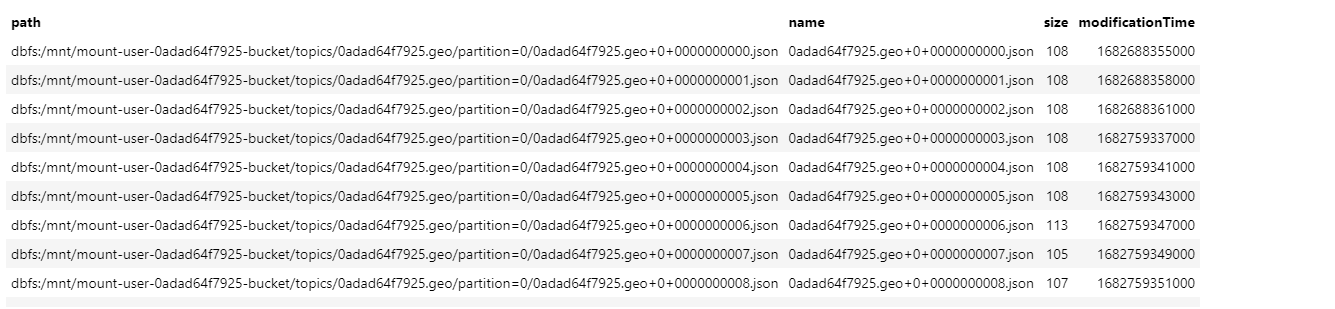

# Extracting each table 

In [ ]:
# File location and type
# Asterisk(*) indicates reading all the content of the specified file that have .json extension
file_location = "/mnt/mount-user-0adad64f7925-bucket/topics/0adad64f7925.geo/partition=0/*.json" 
file_type = "json"
# Ask Spark to infer the schema
infer_schema = "true"
# Read in JSONs from mounted S3 bucket
df = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.load(file_location)
# Display Spark dataframe to check its content
display(df)

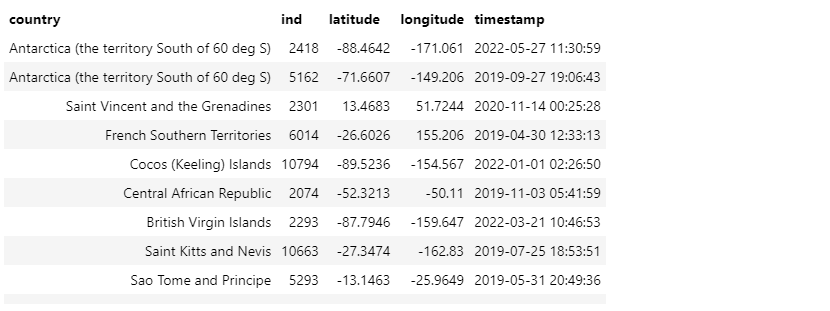

### pin_df

In [ ]:
##pin_df

# File location and type
# Asterisk(*) indicates reading all the content of the specified file that have .json extension
file_location = "/mnt/mount-user-0adad64f7925-bucket/topics/0adad64f7925.pin/partition=0/*.json" 
file_type = "json"
# Ask Spark to infer the schema
infer_schema = "true"
# Read in JSONs from mounted S3 bucket
df_pin = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.load(file_location)
# Display Spark dataframe to check its content
display(df_pin)




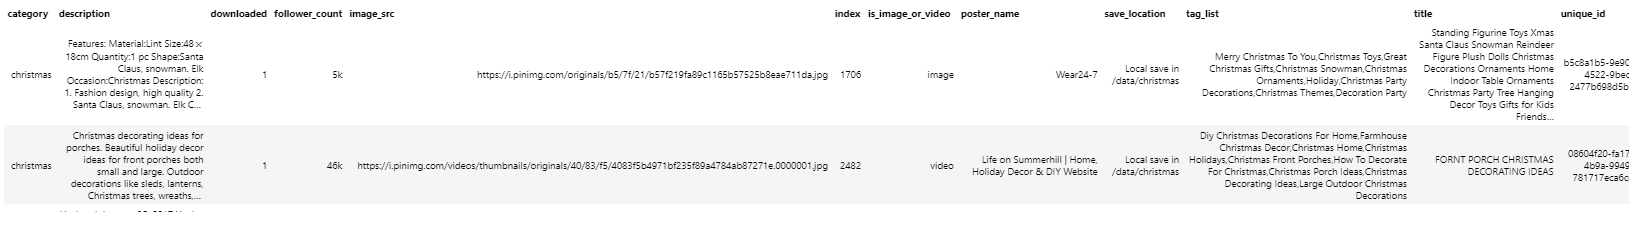

### geo_df

In [ ]:
##geo_df

# File location and type
# Asterisk(*) indicates reading all the content of the specified file that have .json extension
file_location = "/mnt/mount-user-0adad64f7925-bucket/topics/0adad64f7925.geo/partition=0/*.json" 
file_type = "json"
# Ask Spark to infer the schema
infer_schema = "true"
# Read in JSONs from mounted S3 bucket
df_geo = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.load(file_location)
# Display Spark dataframe to check its content
display(df_geo)

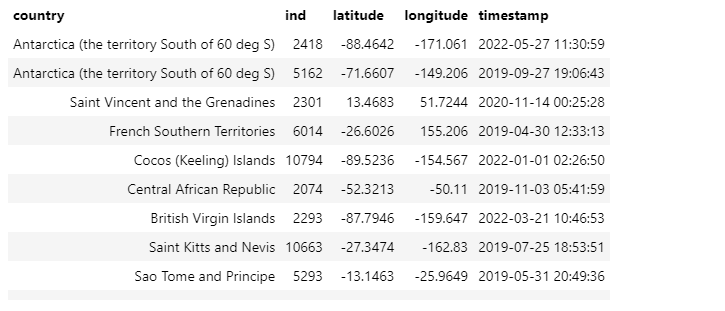

### user_df

In [ ]:
##user_df

# File location and type
# Asterisk(*) indicates reading all the content of the specified file that have .json extension
file_location = "/mnt/mount-user-0adad64f7925-bucket/topics/0adad64f7925.user/partition=0/*.json" 
file_type = "json"
# Ask Spark to infer the schema
infer_schema = "true"
# Read in JSONs from mounted S3 bucket
df_user = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.load(file_location)
# Display Spark dataframe to check its content
display(df_user)

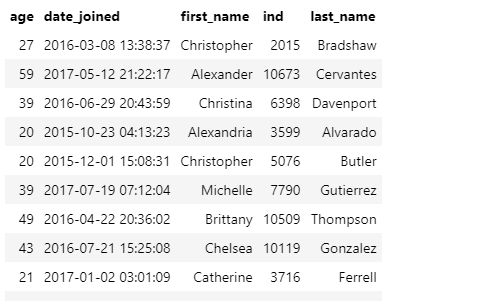